In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data
First of all, we will load and plot the data

In [2]:
data_ori = pd.read_csv('data/realTraffic/realTraffic/speed_6005.csv', parse_dates=['timestamp'], infer_datetime_format=True)
#data_ori['doy'] = data_ori.Date.apply(lambda t:t.dayofyear)
data_ori.sample(3)
#data_ori

,timestamp,value
2456,2015-09-17 12:55:00,97
409,2015-09-03 08:46:00,87
540,2015-09-04 05:12:00,76


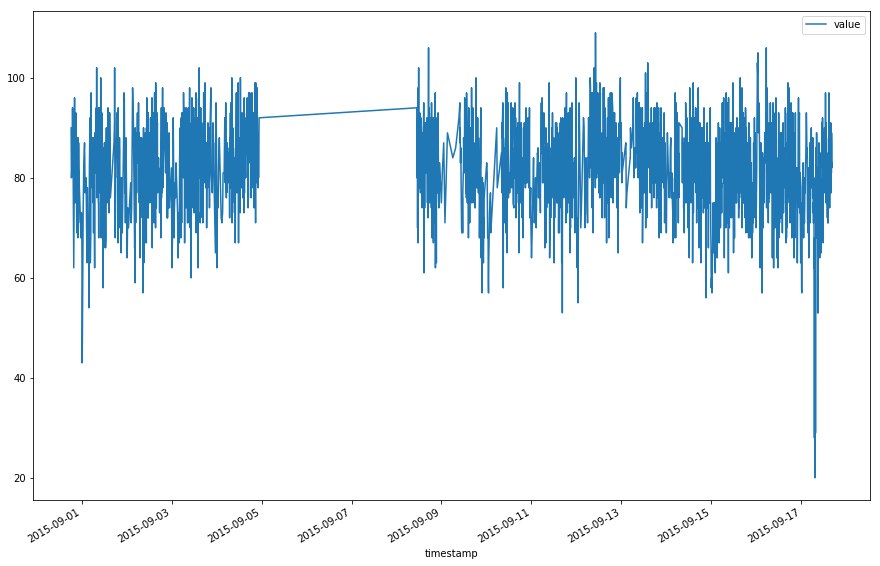

In [11]:
data_ori.plot(x='timestamp', figsize=(15,10))

Simply from the line plot, we can see there're some periodic patterns for each day. So we plot the value line plot for each day to compare.

In [3]:
data = pd.DataFrame()
data['value'] = data_ori.value
data['time'] = data_ori.timestamp.apply(lambda t:t.time())
data['date'] = data_ori.timestamp.apply(lambda t:t.date())
data.sample(3)

,value,time,date
1447,87,02:21:00,2015-09-13
757,75,17:36:00,2015-09-08
507,87,20:02:00,2015-09-03


date
2015-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-01    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-02    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-03    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-04    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-08    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-09    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-10    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-11    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-12    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-13    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-14    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-15    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-16    AxesSubplot(0.125,0.125;0.775x0.755)
2015-09-17    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

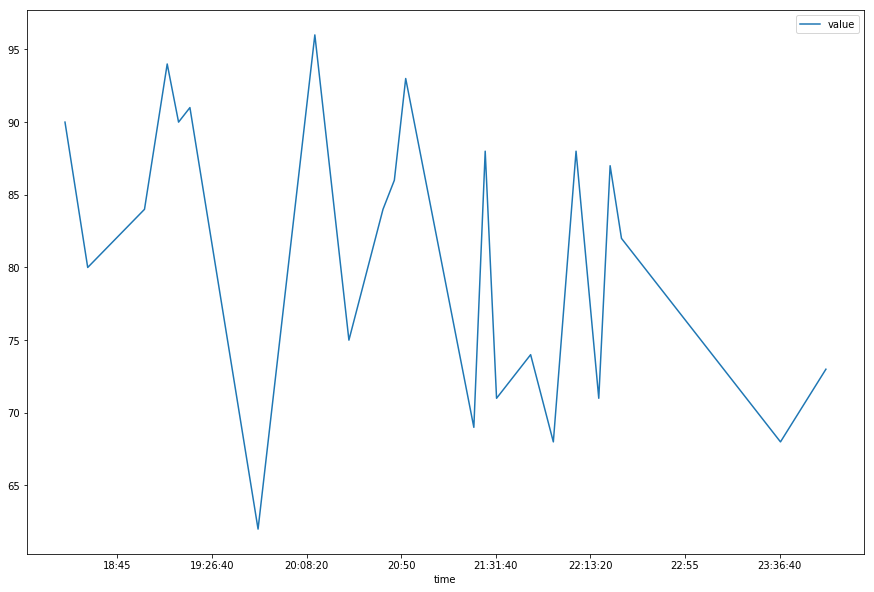

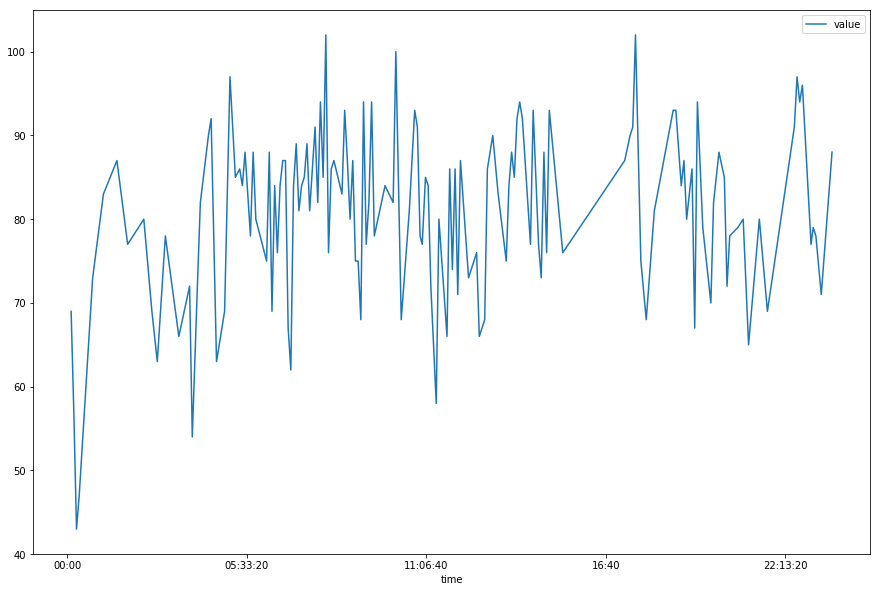

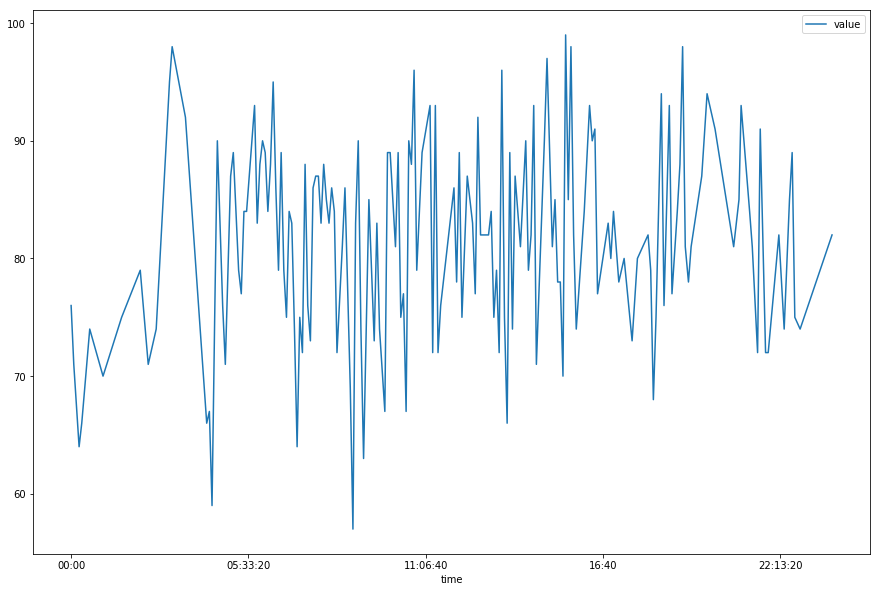

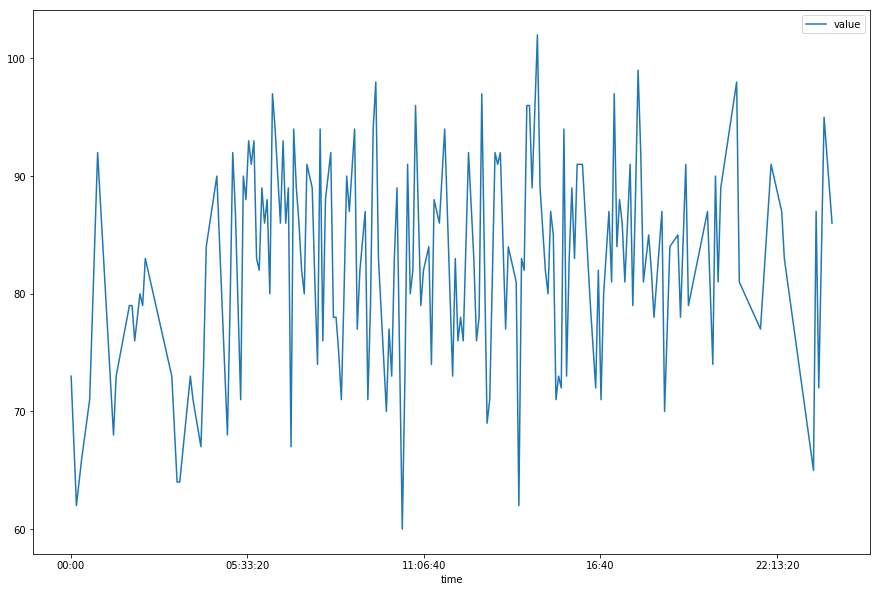

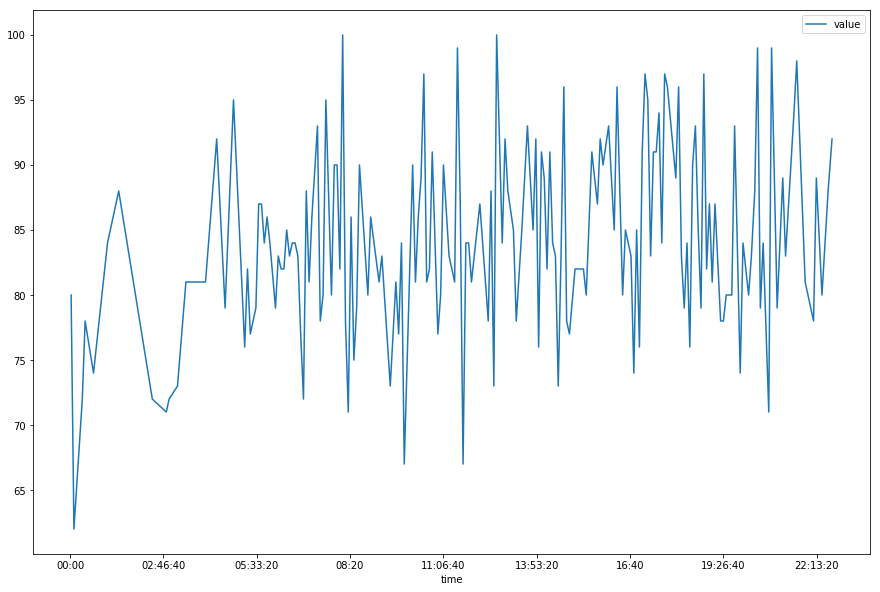

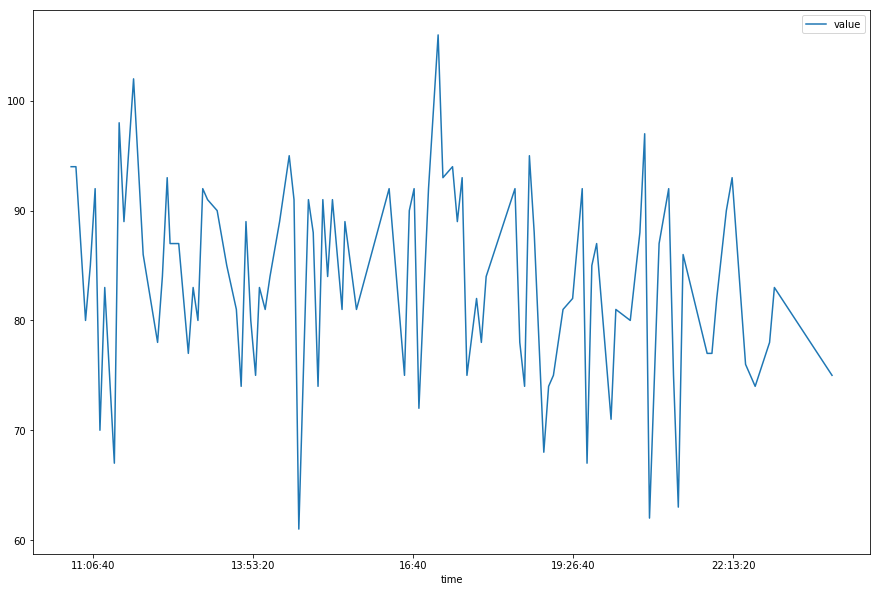

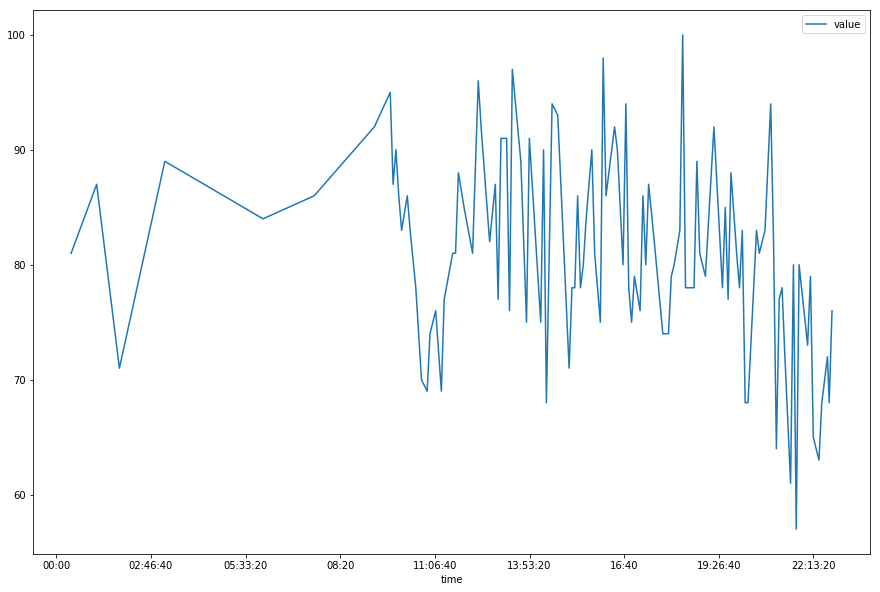

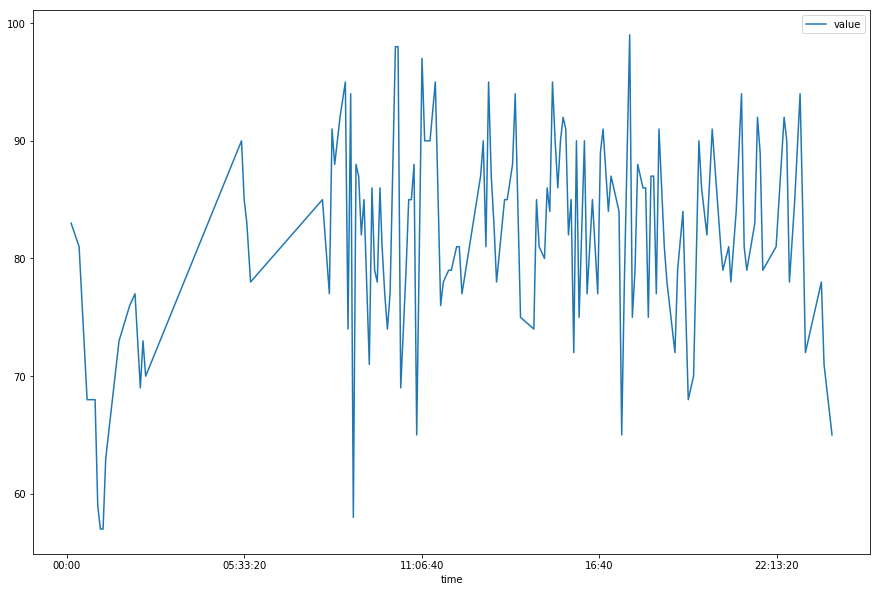

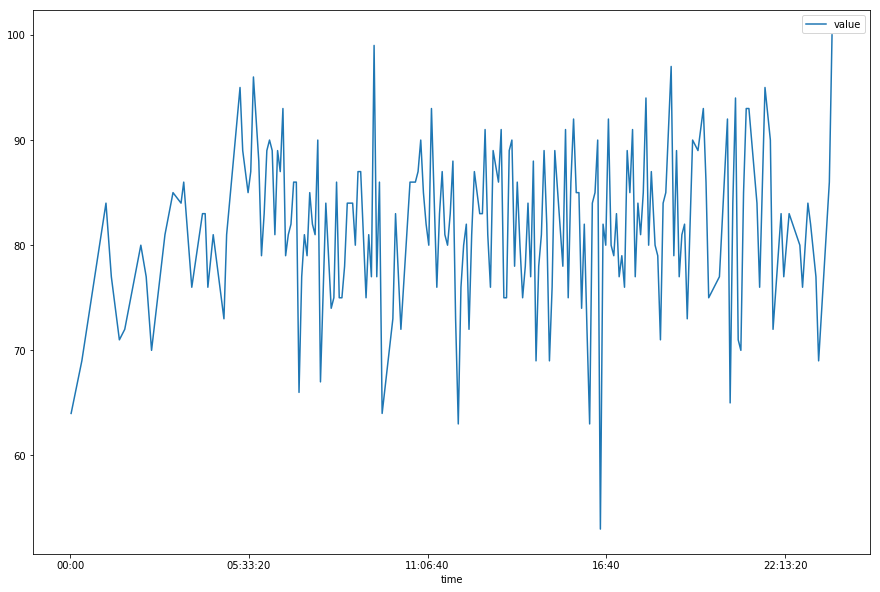

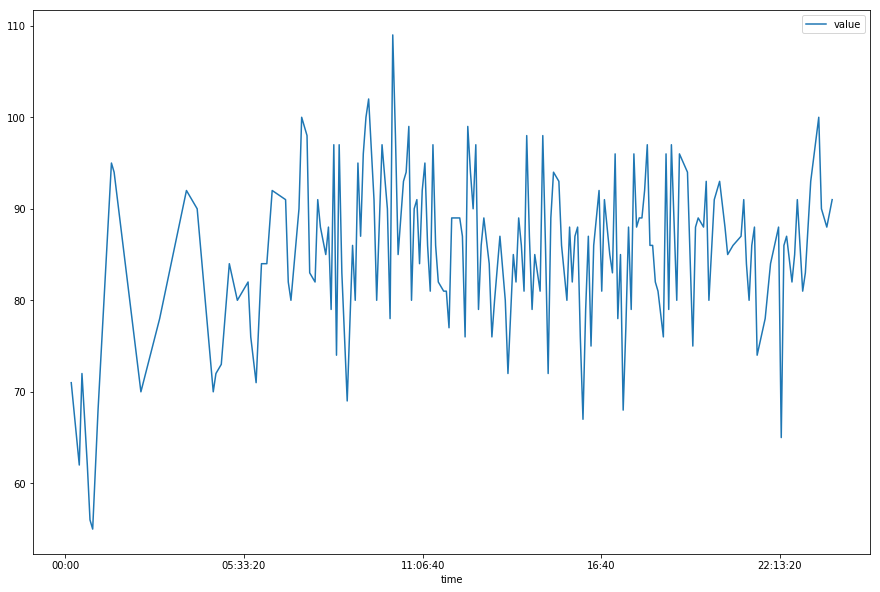

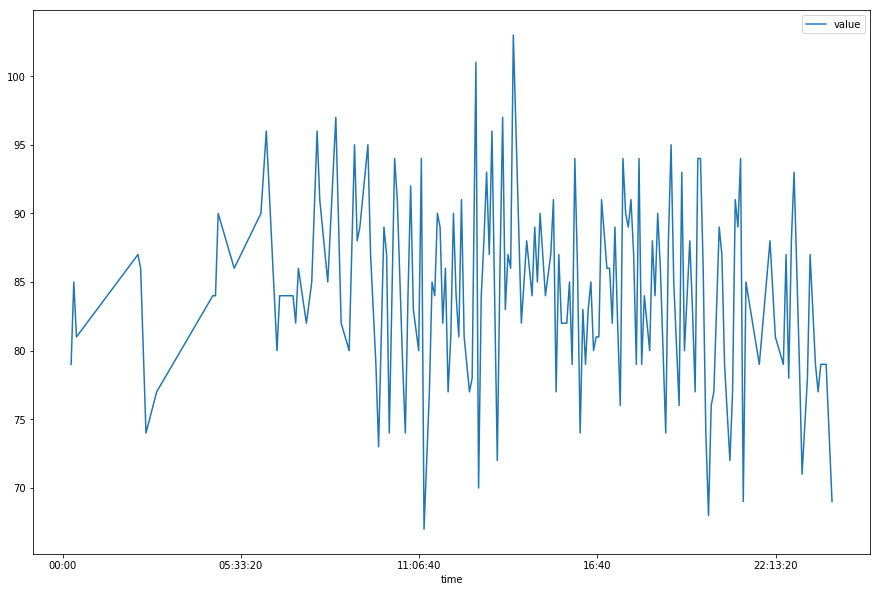

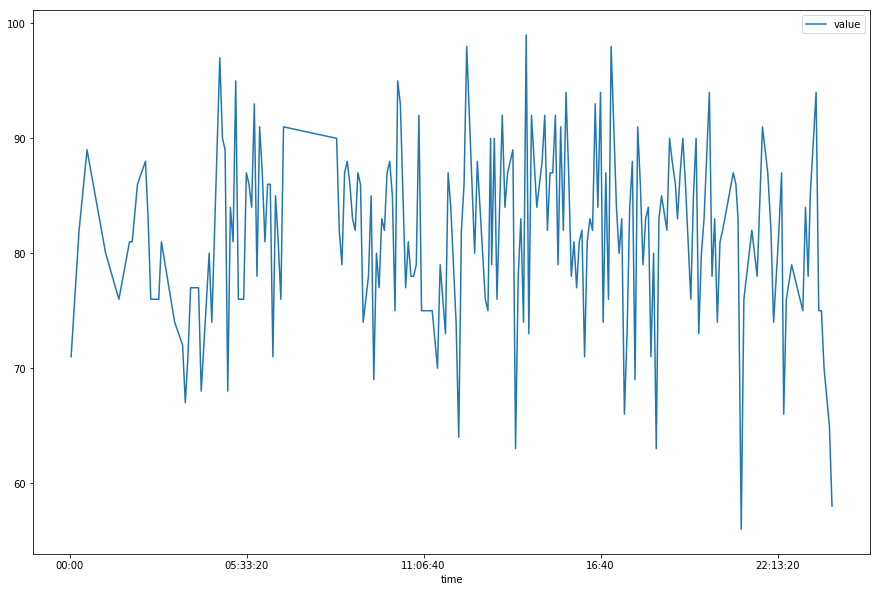

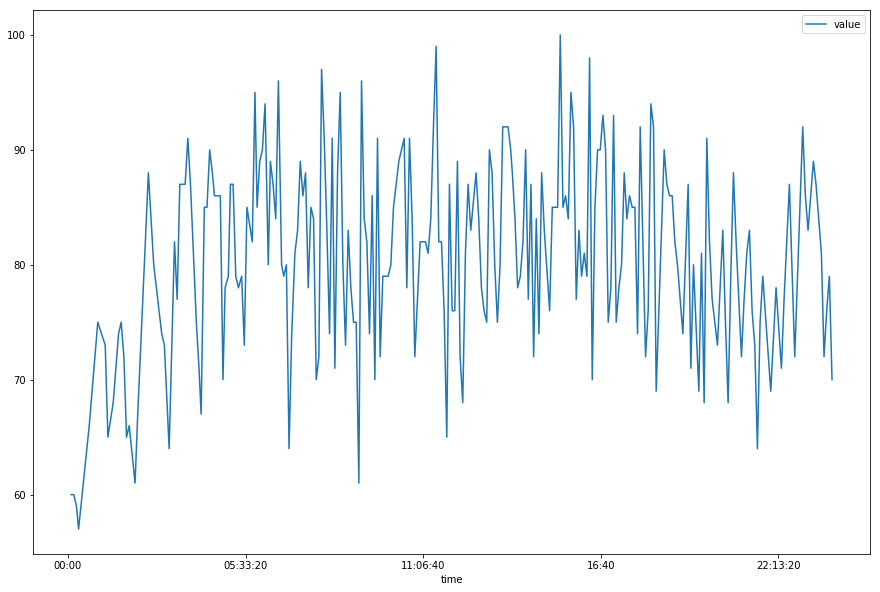

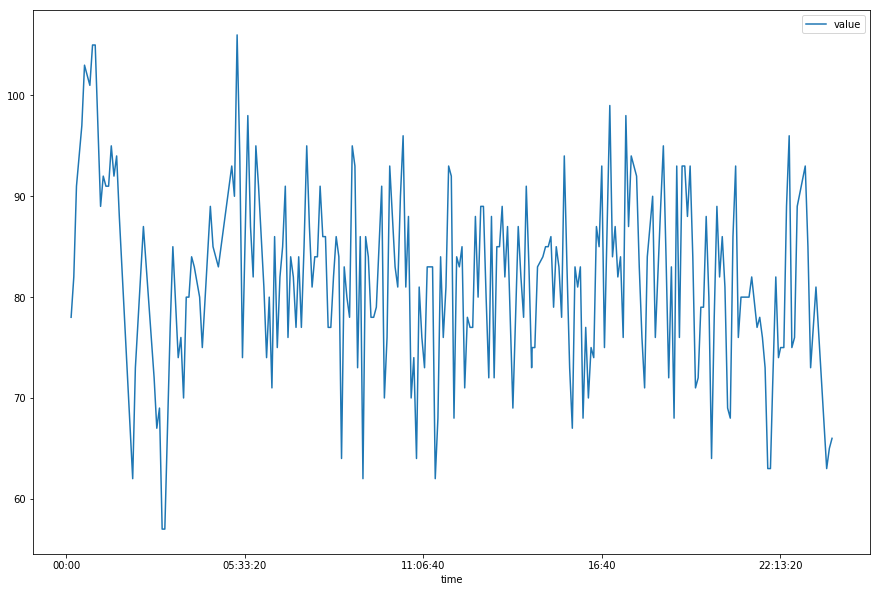

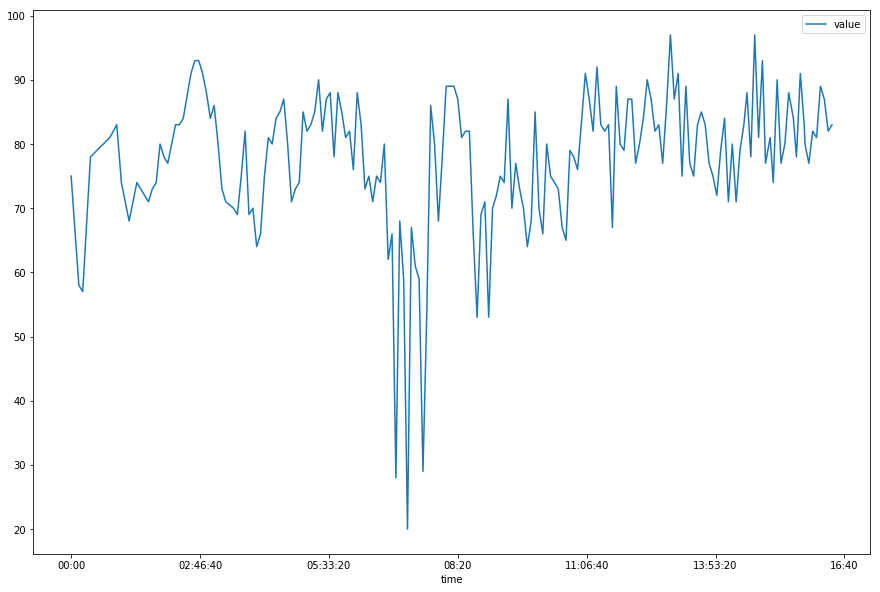

In [14]:
data.groupby('date').plot(x='time', y='value', figsize=(15,10))

From the line charts, the values mostly fall into the interval of [60, 100]. In the last chart, we see some values a lot smaller than 60. 

To simplify the detection, we extract timestamp information to month, day, hour and minute. Year and second are left out in this case because we only have data in the same year, and second part is always zero.

In [4]:
data_pre = pd.DataFrame()
data_pre['value'] = data_ori.value
data_pre['month'] = data_ori.timestamp.apply(lambda t:t.month)
data_pre['day'] = data_ori.timestamp.apply(lambda t:t.day)
data_pre['hour'] = data_ori.timestamp.apply(lambda t:t.hour)
data_pre['minute'] = data_ori.timestamp.apply(lambda t:t.minute)
data_pre.sample(3)

,value,month,day,hour,minute
1071,76,9,11,3,47
607,87,9,4,12,12
1311,80,9,12,9,41


In [5]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100)
clf.fit(data_pre)

# predictions
y_pred_train = clf.predict(data_pre)

In [6]:
print("outliers:", list(y_pred_train).count(-1))

('outliers:', 250)


In [13]:
y_pred_train[40:60]

array([-1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

Now let's add time and detection result back in the dataframe and use the anomal information back in the plot

On our first attempt, we notice scatter plot cannot take timestamp as x axis. Therefore we construct the dataframe to present timestamp as int.

In [25]:
data_pre['timestamp_int'] = data_ori.timestamp.apply(lambda t:t.timestamp())
data_pre['timestamp'] = data_ori.timestamp
#data_pre['timestamp'] = data_ori['timestamp'].timestamp()
data_pre['normal'] = y_pred_train
data_pre.sample(3)

,value,month,day,hour,minute,timestamp,normal,timestamp_int
213,64,9,2,7,5,2015-09-02 07:05:00,-1,1.441178e+09
1690,78,9,14,10,43,2015-09-14 10:43:00,1,1.442227e+09
869,80,9,9,18,8,2015-09-09 18:08:00,1,1.441822e+09


In [26]:
data_pre[40:60]

,value,month,day,hour,minute,timestamp,normal,timestamp_int
40,82,9,1,4,7,2015-09-01 04:07:00,-1,1.441080e+09
41,90,9,1,4,22,2015-09-01 04:22:00,1,1.441081e+09
42,92,9,1,4,27,2015-09-01 04:27:00,-1,1.441082e+09
43,63,9,1,4,37,2015-09-01 04:37:00,-1,1.441082e+09
44,69,9,1,4,52,2015-09-01 04:52:00,-1,1.441083e+09
45,97,9,1,5,2,2015-09-01 05:02:00,-1,1.441084e+09
46,85,9,1,5,12,2015-09-01 05:12:00,1,1.441084e+09
47,86,9,1,5,20,2015-09-01 05:20:00,1,1.441085e+09
48,84,9,1,5,25,2015-09-01 05:25:00,1,1.441085e+09
49,88,9,1,5,30,2015-09-01 05:30:00,1,1.441085e+09


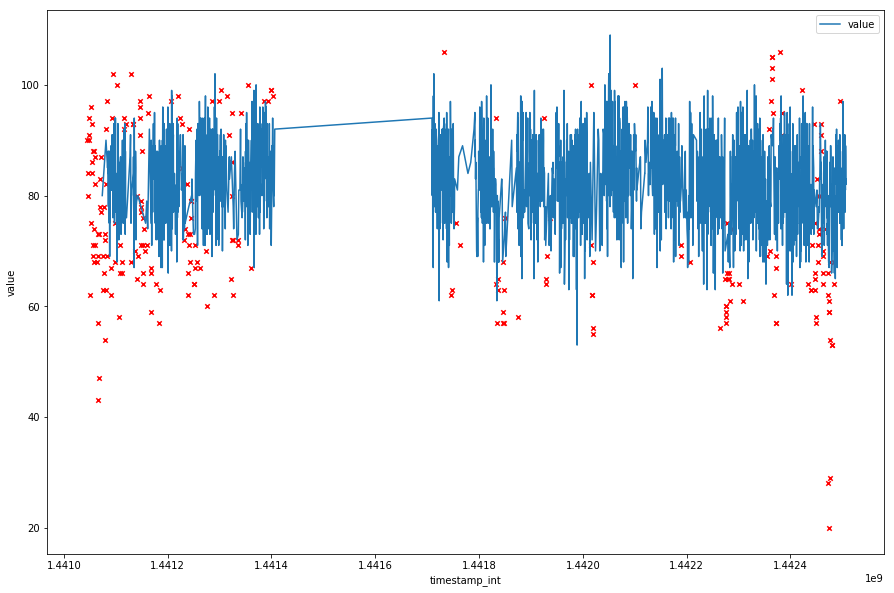

In [32]:
data_nor = data_pre[data_pre.normal == 1]
data_abn = data_pre[data_pre.normal == -1]

#plt.figure( figsize=(15,10) )
#plt.xlabel('date time')
#plt.ylabel('speed')

#ax1 = data_nor.plot(x='timestamp_int', y='value')
#ax2 = data_abn.plot(kind='scatter', x='timestamp_int', y='value')

#ax1.legend(loc=1)
#ax2.legend(loc=2)

ax = plt.gca()
data_nor.plot(x='timestamp_int', y='value', ax=ax, figsize=(15,10))
data_abn.plot(kind='scatter', x='timestamp_int', y='value', ax = ax, marker='x', color='r', figsize=(15,10))

plt.show()

# Conclusion
In the final chart, we plot the anomaly data as a red 'x' and use line chart to present the normal data. The chart looks a lot more smooth. We should eliminate anomal data before data processing.